## C. Sentiment Analysis - NER : PART-I

This module talks about the overall sentiment analysis, along with Named Entity Recognition.

In [1]:
# Import required libraries/packages
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import nltk


In [2]:
import flair

# Check the version of Flair
print(flair.__version__)

2023-05-27 19:06:48.216178: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 19:06:50.960032: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-05-27 19:06:50.960248: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

0.12.2


#### a) Data Extraction

In [3]:
# Load the dataset
news_sa = pd.read_parquet('processed_news_articles.parquet', engine='pyarrow')

# Check the shape
news_sa.shape

(160842, 9)

In [4]:
# Display a few records
news_sa.head(3)

,url,date,language,title,text,cleaned_text,lemmatized_text,num_tokens,token_bucket
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Artificial intelligence improves parking effic...,Artificial intelligence improves parking effic...,5752,5001-10000
2,http://www.dataweek.co.za/12835r,2021-03-26,en,"Forget ML, AI and Industry 4.0 – obsolescence ...","\n\nForget ML, AI and Industry 4.0 – obsolesce...",Forget ML AI Industry obsolescence focus Febru...,Forget ML AI Industry obsolescence focus Febru...,13520,10001-15000
3,http://www.homeoffice.consumerelectronicsnet.c...,2021-03-10,en,Strategy Analytics: 71% of Smartphones Sold Gl...,\n\nStrategy Analytics: 71% of Smartphones Sol...,Strategy Analytics Smartphones Sold Globally A...,Strategy Analytics Smartphones Sold Globally A...,9490,5001-10000


#### b) Sentiment Analysis using Flair

In [5]:
from tqdm import tqdm
from flair.models import TextClassifier
from flair.data import Sentence

# Load the pre-trained sentiment analysis model
classifier = TextClassifier.load("en-sentiment")

In [6]:
# Function to analyze sentiment for a given text
def analyze_sentiment(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    sentiment = sentence.labels[0].value
    return sentiment

# Apply sentiment analysis on 'lemmatized_text' column with tqdm progress bar
news_sa['sentiment'] = ''

for i, text in tqdm(news_sa['lemmatized_text'].items(), total=len(news_sa)):
    sentiment = analyze_sentiment(text)
    news_sa.loc[i, 'sentiment'] = sentiment

100%|██████████| 160842/160842 [1:26:17<00:00, 31.06it/s]


In [7]:
news_sa['sentiment'].value_counts()

sentiment
POSITIVE    121107
NEGATIVE     39735
Name: count, dtype: int64

In [ ]:
news_sa.head(5)

,url,date,language,title,text,cleaned_text,lemmatized_text,num_tokens,token_bucket,sentiment
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Artificial intelligence improves parking effic...,Artificial intelligence improves parking effic...,5752,5001-10000,POSITIVE
2,http://www.dataweek.co.za/12835r,2021-03-26,en,"Forget ML, AI and Industry 4.0 – obsolescence ...","\n\nForget ML, AI and Industry 4.0 – obsolesce...",Forget ML AI Industry obsolescence focus Febru...,Forget ML AI Industry obsolescence focus Febru...,13520,10001-15000,POSITIVE
3,http://www.homeoffice.consumerelectronicsnet.c...,2021-03-10,en,Strategy Analytics: 71% of Smartphones Sold Gl...,\n\nStrategy Analytics: 71% of Smartphones Sol...,Strategy Analytics Smartphones Sold Globally A...,Strategy Analytics Smartphones Sold Globally A...,9490,5001-10000,POSITIVE
4,http://www.itbusinessnet.com/2020/10/olympus-t...,2020-10-20,en,Olympus to Support Endoscopic AI Diagnosis Edu...,\n\nOlympus to Support Endoscopic AI Diagnosis...,Olympus Support Endoscopic AI Diagnosis Educat...,Olympus Support Endoscopic AI Diagnosis Educat...,16639,15001-20000,POSITIVE
5,http://www.mysmartrend.com/news-briefs/technic...,2020-04-17,en,Cr Bard Inc Has Returned 48.9% Since SmarTrend...,\n\nCr Bard Inc Has Returned 48.9% Since SmarT...,Cr Bard Inc Has Returned Since SmarTrend Recom...,Cr Bard Inc Has Returned Since SmarTrend Recom...,2705,1001-5000,NEGATIVE


#### c) Named Entity Recognition

In [ ]:
# Importing required modules
import spacy
import pandas as pd
from tqdm import tqdm

# Load the Spacy model
nlp = spacy.load('en_core_web_lg', disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"])

# Function to extract entities and their labels
def extract_entities_and_labels(text, nlp_model):
    doc = nlp_model(text)
    entities = [ent.text for ent in doc.ents if ent.label_ in ['PERSON', 'ORG', 'GPE', 'LOC', 'PRODUCT', 'COMPANY']]
    entity_labels = [ent.label_ for ent in doc.ents if ent.label_ in ['PERSON', 'ORG', 'GPE', 'LOC', 'PRODUCT', 'COMPANY']]
    return entities, entity_labels

# Apply the function to the 'lemmatized_text' column
tqdm.pandas(desc='Entity Extraction Progress')
news_sa[['entities', 'entity_labels']] = news_sa['lemmatized_text'].progress_apply(lambda x: pd.Series(extract_entities_and_labels(x, nlp)))

news_sa


2023-05-27 20:33:25.422810: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-27 20:33:25.424864: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-27 20:33:25.429924: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-27 20:33:25.431864: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-27 20:33:25.434636: I tensorflow/compiler/xla/stream_executo

,url,date,language,title,text,cleaned_text,lemmatized_text,num_tokens,token_bucket,sentiment,entities,entity_labels
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Artificial intelligence improves parking effic...,Artificial intelligence improves parking effic...,5752,5001-10000,POSITIVE,"[ETC, Yangzhuang, Shijingshan, Beijing, ETC, A...","[ORG, GPE, GPE, GPE, ORG, PRODUCT, ORG, GPE, G..."
2,http://www.dataweek.co.za/12835r,2021-03-26,en,"Forget ML, AI and Industry 4.0 – obsolescence ...","\n\nForget ML, AI and Industry 4.0 – obsolesce...",Forget ML AI Industry obsolescence focus Febru...,Forget ML AI Industry obsolescence focus Febru...,13520,10001-15000,POSITIVE,"[Forget ML AI Industry, Forget ML AI Industry,...","[ORG, ORG, PERSON, ORG, ORG, PRODUCT, ORG, ORG..."
3,http://www.homeoffice.consumerelectronicsnet.c...,2021-03-10,en,Strategy Analytics: 71% of Smartphones Sold Gl...,\n\nStrategy Analytics: 71% of Smartphones Sol...,Strategy Analytics Smartphones Sold Globally A...,Strategy Analytics Smartphones Sold Globally A...,9490,5001-10000,POSITIVE,"[Artificial Intelligence Now Powers, Smartphon...","[ORG, ORG, ORG, ORG, PRODUCT, ORG, PRODUCT, OR..."
4,http://www.itbusinessnet.com/2020/10/olympus-t...,2020-10-20,en,Olympus to Support Endoscopic AI Diagnosis Edu...,\n\nOlympus to Support Endoscopic AI Diagnosis...,Olympus Support Endoscopic AI Diagnosis Educat...,Olympus Support Endoscopic AI Diagnosis Educat...,16639,15001-20000,POSITIVE,[Olympus Support Endoscopic AI Diagnosis Educa...,"[ORG, GPE, GPE, GPE, ORG, ORG, ORG, GPE, GPE, ..."
5,http://www.mysmartrend.com/news-briefs/technic...,2020-04-17,en,Cr Bard Inc Has Returned 48.9% Since SmarTrend...,\n\nCr Bard Inc Has Returned 48.9% Since SmarT...,Cr Bard Inc Has Returned Since SmarTrend Recom...,Cr Bard Inc Has Returned Since SmarTrend Recom...,2705,1001-5000,NEGATIVE,"[Cr Bard Inc, Home Advantages Products News An...","[ORG, ORG, ORG, ORG, PERSON, ORG, ORG, ORG, OR..."
...,...,...,...,...,...,...,...,...,...,...,...,...
200324,https://www.wymt.com/prnewswire/2023/03/01/dri...,2023-03-01,en,"Drift Introduces GPT Integration, Advancing AI...","Drift Introduces GPT Integration, Advancing AI...",Drift Introduces GPT Integration Advancing AI ...,Drift Introduces GPT Integration Advancing AI ...,6153,5001-10000,POSITIVE,"[TenTop, TeamContact UsCareers, VideosCircle C...","[PERSON, ORG, ORG, ORG, PERSON, PERSON, ORG, P..."
200325,https://www.wymt.com/prnewswire/2023/04/28/uro...,2023-04-28,en,Urologists Explore AI for Prostate Cancer Dete...,Urologists Explore AI for Prostate Cancer Dete...,Urologists Explore AI Prostate Cancer Detectio...,Urologists Explore AI Prostate Cancer Detectio...,4557,1001-5000,POSITIVE,"[Skip LocalWatch WYMT NowFlood ExclusiveWatch,...","[PERSON, PERSON, ORG, ORG, ORG, PERSON, PRODUC..."
200326,https://www.yorkdispatch.com/story/opinion/con...,2023-04-16,en,Does AI mean the 4-day workweek is almost here?,Does AI mean the 4-day workweek is almost here...,Does AI mean day workweek almost Trinity Thoma...,Does AI mean day workweek almost Trinity Thoma...,7080,5001-10000,POSITIVE,"[Trinity Thomas, Oklahoma, NCAA, Nicholas Gold...","[ORG, GPE, ORG, PERSON, PERSON, PRODUCT, ORG, ..."
200327,https://www.zazoom.it/2020-12-14/comviva-and-o...,2020-12-14,en,Comviva and Ooredoo Kuwait form strategic part...,\n\nComviva and Ooredoo Kuwait form strategic ...,Comviva Ooredoo Kuwait form strategic partners...,Comviva Ooredoo Kuwait form strategic partners...,2832,1001-5000,POSITIVE,"[Comviva Ooredoo, Kuwait, Machine Learning dri...","[ORG, GPE, ORG, ORG, PERSON, PERSON, PERSON, O..."


In [ ]:
# Check for any missing values
news_sa.isna().sum()

url                0
date               0
language           0
title              0
text               0
cleaned_text       0
lemmatized_text    0
num_tokens         0
token_bucket       0
sentiment          0
entities           0
entity_labels      0
dtype: int64

In [ ]:

# Save negative dataset in Parquet format
news_sa.to_parquet('sentiment-dataset.parquet', engine='pyarrow')


#### d) Overall Sentiment Trend

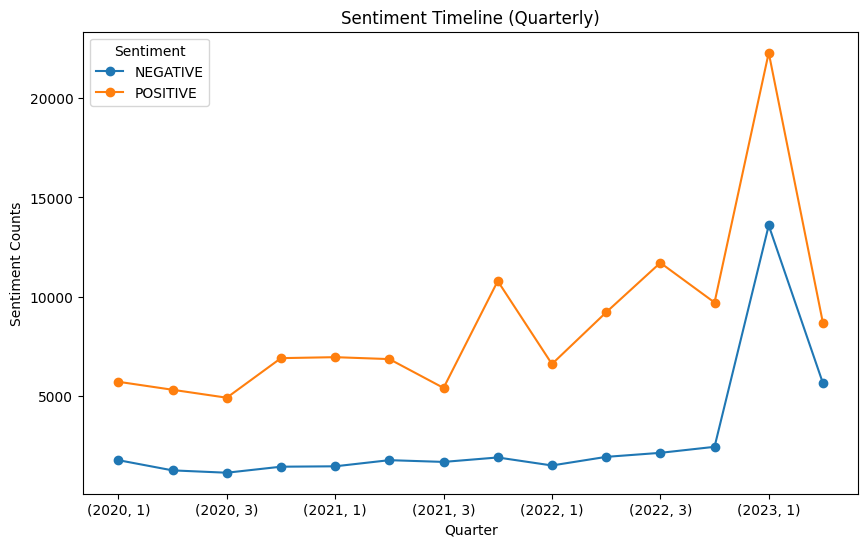

In [ ]:
import matplotlib.pyplot as plt

# Convert the date column to datetime format if it's not already
news_sa['date'] = pd.to_datetime(news_sa['date'])

# Extract the year and quarter from the date column
news_sa['year'] = news_sa['date'].dt.year
news_sa['quarter'] = news_sa['date'].dt.quarter

# Group the data by year, quarter, and sentiment to count the occurrences
sentiment_counts = news_sa.groupby([news_sa['year'], news_sa['quarter'], 'sentiment']).size().unstack()

# Plot the timeline
plt.figure(figsize=(10, 6))
sentiment_counts.plot(marker='o', linestyle='-', ax=plt.gca())
plt.xlabel('Quarter')
plt.ylabel('Sentiment Counts')
plt.title('Sentiment Timeline (Quarterly)')
plt.legend(title='Sentiment')
plt.show()


#### e) PRODUCT entities

In [25]:
from collections import Counter
import matplotlib.pyplot as plt

# Function to get entities with 'PRODUCT' label
def get_product_entities(entities, labels):
    return [entity for entity, label in zip(entities, labels) if label in  ['PRODUCT']]

# Extract entities labeled as 'PRODUCT' from the DataFrame
product_entities = news_sa.apply(lambda row: get_product_entities(row['entities'], row['entity_labels']), axis=1)


In [ ]:
# Convert 'date' column to datetime
news_sa['date'] = pd.to_datetime(news_sa['date'])

# Extract year and quarter
news_sa['quarter'] = news_sa['date'].dt.to_period('Q')

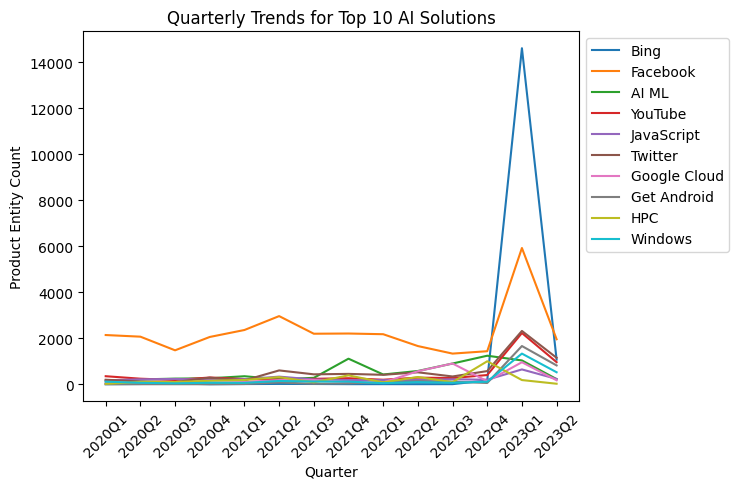

In [28]:

# Flatten the list of entities and get the top 10
all_product_entities = [entity for entities in product_entities for entity in entities]
top_10_products = [product for product, _ in Counter(all_product_entities).most_common(11)]

# Remove the top product entity
top_10_products = top_10_products[1:]

# Store the entity counts by quarter in a dictionary
product_counts_by_quarter = {product: {} for product in top_10_products}

# Count the occurrences of the top 10 product entities by quarter
for quarter, group in news_sa.groupby('quarter'):
    quarter_product_entities = [entity for entities in group['entities'] for entity in entities if entity in top_10_products]
    quarter_product_counts = Counter(quarter_product_entities)
    for product in top_10_products:
        product_counts_by_quarter[product][quarter] = quarter_product_counts[product]

# Prepare the data for plotting
quarterly_product_counts = pd.DataFrame(product_counts_by_quarter).fillna(0)

# Plot the quarterly trends for the top 10 product entities
for product in top_10_products:
    plt.plot(quarterly_product_counts.index.astype(str), quarterly_product_counts[product], label=product)

plt.xlabel('Quarter')
plt.ylabel('Product Entity Count')
plt.xticks(rotation=45)  # rotate the x-axis labels to make them easier to read
plt.legend(loc='upper left', bbox_to_anchor=(1,1))  # place the legend outside the plot
plt.title('Quarterly Trends for Top 10 AI Solutions')
plt.show()


#### f) ORG/COMPANY Entities

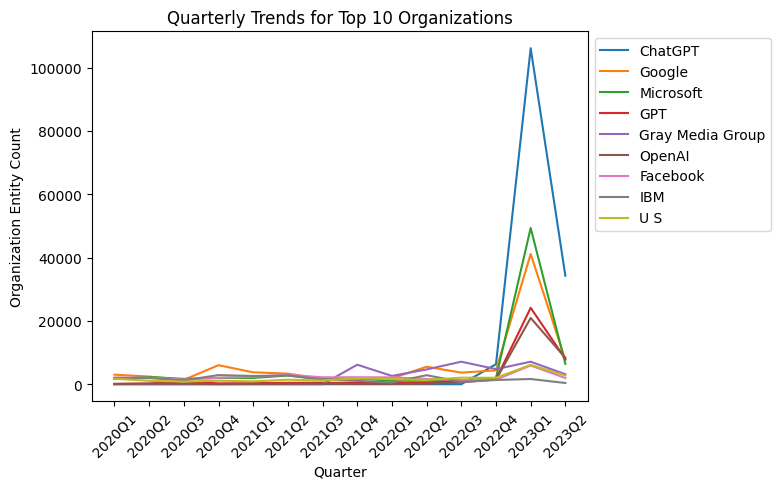

In [29]:

# Function to get entities with 'ORG/COMPANY' label
def get_org_entities(entities, labels):
    return [entity for entity, label in zip(entities, labels) if label in  ['ORG', 'COMPANY']]

# Extract entities labeled as 'ORG/COMPANY' from the DataFrame
org_entities = news_sa.apply(lambda row: get_org_entities(row['entities'], row['entity_labels']), axis=1)

# Flatten the list of entities and get the top 10
all_org_entities = [entity for entities in org_entities for entity in entities]
top_10_orgs = [org for org, _ in Counter(all_org_entities).most_common(10)]

# Remove the top ORG/COMPANY entity
top_10_orgs = top_10_orgs[1:]

# Store the entity counts by quarter in a dictionary
org_counts_by_quarter = {org: {} for org in top_10_orgs}

# Count the occurrences of the top 10 ORG/COMPANY entities by quarter
for quarter, group in news_sa.groupby('quarter'):
    quarter_org_entities = [entity for entities in group['entities'] for entity in entities if entity in top_10_orgs]
    quarter_org_counts = Counter(quarter_org_entities)
    for org in top_10_orgs:
        org_counts_by_quarter[org][quarter] = quarter_org_counts[org]

# Prepare the data for plotting
quarterly_org_counts = pd.DataFrame(org_counts_by_quarter).fillna(0)

# Plot the quarterly trends for the top 10 ORG/COMPANY entities
for org in top_10_orgs:
    plt.plot(quarterly_org_counts.index.astype(str), quarterly_org_counts[org], label=org)

plt.xlabel('Quarter')
plt.ylabel('Organization Entity Count')
plt.xticks(rotation=45)  # rotate the x-axis labels to make them easier to read
plt.legend(loc='upper left', bbox_to_anchor=(1,1))  # place the legend outside the plot
plt.title('Quarterly Trends for Top 10 Organizations')
plt.show()


#### g) LOCATION Entities

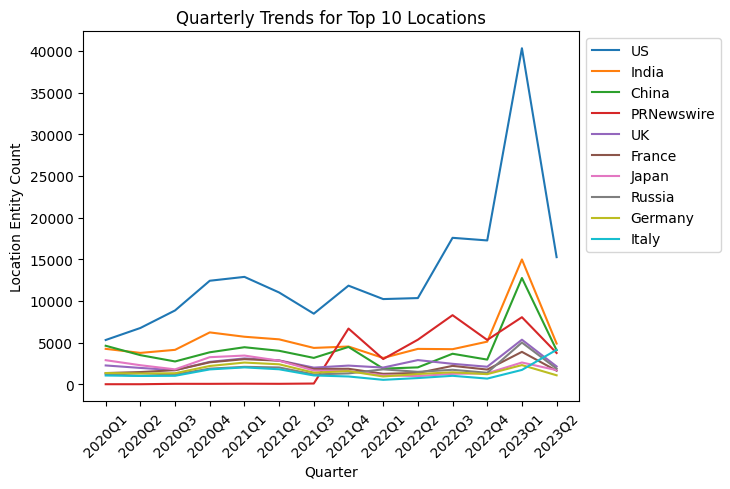

In [30]:

# Function to get entities with 'LOC/GPE' label
def get_loc_entities(entities, labels):
    return [entity for entity, label in zip(entities, labels) if label in  ['GPE', 'LOC']]

# Extract entities labeled as 'LOC/GPE' from the DataFrame
loc_entities = news_sa.apply(lambda row: get_loc_entities(row['entities'], row['entity_labels']), axis=1)

# Flatten the list of entities and get the top 10
all_loc_entities = [entity for entities in loc_entities for entity in entities]
top_10_loc = [loc for loc, _ in Counter(all_loc_entities).most_common(10)]

# Store the entity counts by quarter in a dictionary
loc_counts_by_quarter = {loc: {} for loc in top_10_loc}

# Count the occurrences of the top 10 LOC/GPE entities by quarter
for quarter, group in news_sa.groupby('quarter'):
    quarter_loc_entities = [entity for entities in group['entities'] for entity in entities if entity in top_10_loc]
    quarter_loc_counts = Counter(quarter_loc_entities)
    for loc in top_10_loc:
        loc_counts_by_quarter[loc][quarter] = quarter_loc_counts[loc]

# Prepare the data for plotting
quarterly_loc_counts = pd.DataFrame(loc_counts_by_quarter).fillna(0)

# Plot the quarterly trends for the top 10 LOC/GPE entities
for loc in top_10_loc:
    plt.plot(quarterly_loc_counts.index.astype(str), quarterly_loc_counts[loc], label=loc)

plt.xlabel('Quarter')
plt.ylabel('Location Entity Count')
plt.xticks(rotation=45)  # rotate the x-axis labels to make them easier to read
plt.legend(loc='upper left', bbox_to_anchor=(1,1))  # place the legend outside the plot
plt.title('Quarterly Trends for Top 10 Locations')
plt.show()


In [31]:
# Filter the DataFrame for rows where entities include 'US', 'India', or 'China'
target_locations = ['us', 'india', 'china']
target_location_rows = news_sa[news_sa['entities'].apply(lambda entities: any(loc in entities for loc in target_locations))]

# Select a random sample of 10 rows from this filtered DataFrame
random_sample = target_location_rows.sample(10)

# Print the titles of the selected rows
print(random_sample['title'])


123176    P&R Dental Strategies and Denti.AI Join Forces...
43400     ChatGPT’s evil twin 'DAN' shows the dark side ...
134221    ChatGPT isn't getting an upgrade anytime soon ...
84458                      What is ChatGPT-4? | Tom's Guide
158164    Student ‘passes university exam’ with ChatGPT ...
110570    70% of customers expect fair AI interactions f...
196397        Last Word: AI used for good - SFChronicle.com
149918    Spheroid Universe to introduce AI Avatars usin...
95444     New Bing with ChatGPT will convert many of our...
108970    Exclusive: Lots of us still really don't trust...
Name: title, dtype: object


In [36]:
print(news_sa['title'][174467])
print(news_sa['title'][27114])
print(news_sa['title'][49882])
print(news_sa['title'][195884])
print(news_sa['title'][5702])

Simple AI read that covers complex issues of our time - The East African
Shift Insurance Suite Now Applies Artificial Intelligence Across Policy Lifecycle Processes
Jonathan Nolan reveals the surprising sci-fi reference behind the mysterious 'Westworld' AI system 'Rehoboam', Business Insider - Business Insider Malaysia
Global Artificial Intelligence (AI) in Medical Diagnostics Market 2021-2026 (Impact of Covid-19) | Microsoft Corporation,NVIDIA, etc. – Reviewindependent
Can AI Tools Like ChatGPT Take on the Stock Market? - Money Morning Australia


#### h) PERSON Entities

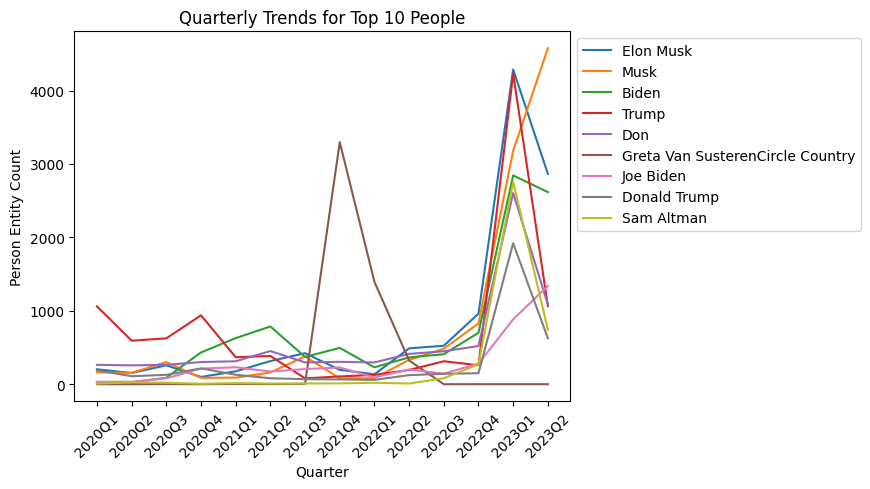

In [44]:

# Function to get entities with 'PERSON' label
def get_person_entities(entities, labels):
    return [entity for entity, label in zip(entities, labels) if label in  ['PERSON']]

# Extract entities labeled as 'PERSON' from the DataFrame
person_entities = news_sa.apply(lambda row: get_person_entities(row['entities'], row['entity_labels']), axis=1)

# Flatten the list of entities and get the top 10
all_person_entities = [entity for entities in person_entities for entity in entities]
top_10_person = [person for person, _ in Counter(all_person_entities).most_common(12)]

# Exclude 'bard' and 'bing' from the top PERSON list
top_10_person = [person for person in top_10_person if person not in ['bard', 'Bard', 'bing', 'Bing', 'Instagram']]

# Store the entity counts by quarter in a dictionary
person_counts_by_quarter = {person: {} for person in top_10_person}

# Count the occurrences of the top 10 PERSON entities by quarter
for quarter, group in news_sa.groupby('quarter'):
    quarter_person_entities = [entity for entities in group['entities'] for entity in entities if entity in top_10_person]
    quarter_person_counts = Counter(quarter_person_entities)
    for person in top_10_person:
        person_counts_by_quarter[person][quarter] = quarter_person_counts[person]

# Prepare the data for plotting
quarterly_person_counts = pd.DataFrame(person_counts_by_quarter).fillna(0)

# Plot the quarterly trends for the top 10 PERSON entities
for person in top_10_person:
    plt.plot(quarterly_person_counts.index.astype(str), quarterly_person_counts[person], label=person)

plt.xlabel('Quarter')
plt.ylabel('Person Entity Count')
plt.xticks(rotation=45)  # rotate the x-axis labels to make them easier to read
plt.legend(loc='upper left', bbox_to_anchor=(1,1))  # place the legend outside the plot
plt.title('Quarterly Trends for Top 10 People')
plt.show()
